# Import Data From SQL Server

In [1]:
pip install pyodbc pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyodbc
import pandas as pd

# Connection config
server = 'RAMYA\\SQLEXPRESS'
database = 'Supply_Chain'
driver = '{ODBC Driver 17 for SQL Server}'  # Ensure ODBC Driver 17 is installed

# Establish connection
conn = pyodbc.connect(
    f'DRIVER={driver};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'Trusted_Connection=yes;'
)

# Load DataCo table into a DataFrame
query = "SELECT * FROM dbo.DataCo"
data_co = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Preview first 5 rows
print(data_co.head())
print(f"DataCo loaded. Rows: {len(data_co)}")


C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


      Type  Days_for_shipping_real  Days_for_shipment_scheduled  \
0     CASH                       2                            4   
1  PAYMENT                       3                            4   
2  PAYMENT                       3                            4   
3  PAYMENT                       3                            4   
4     CASH                       5                            4   

   Benefit_per_order  Sales_per_customer   Delivery_Status  \
0          88.790001          239.979996  Advance shipping   
1          91.180000          193.990005  Advance shipping   
2          68.250000          227.500000  Advance shipping   
3          36.470001          107.889999  Advance shipping   
4           4.100000           40.980000     Late delivery   

   Late_delivery_risk  Category_Id     Category_Name Customer_City  ...  \
0               False           43  Camping & Hiking       Hickory  ...   
1               False           48      Water Sports       Chicago  ...   

In [4]:
print(data_co.columns.tolist())

['Type', 'Days_for_shipping_real', 'Days_for_shipment_scheduled', 'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status', 'Late_delivery_risk', 'Category_Id', 'Category_Name', 'Customer_City', 'Customer_Country', 'Customer_Email', 'Customer_Fname', 'Customer_Id', 'Customer_Lname', 'Customer_Password', 'Customer_Segment', 'Customer_State', 'Customer_Street', 'Customer_Zipcode', 'Department_Id', 'Department_Name', 'Latitude', 'Longitude', 'Market', 'Order_City', 'Order_Country', 'Order_Customer_Id', 'order_date_DateOrders', 'Order_Id', 'Order_Item_Cardprod_Id', 'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Order_Item_Id', 'Order_Item_Product_Price', 'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Sales', 'Order_Item_Total', 'Order_Profit_Per_Order', 'Order_Region', 'Order_State', 'Order_Status', 'Order_Zipcode', 'Product_Card_Id', 'Product_Category_Id', 'Product_Description', 'Product_Image', 'Product_Name', 'Product_Price', 'Product_Status', 'shipping_date_DateOrders', 'S

# KPI

In [6]:
# --- KPI Calculations ---

# Total Orders
total_orders = data_co["Order_Id"].nunique()

# Total Customers
total_customers = data_co["Customer_Id"].nunique()

# Total Revenue (DAX equivalent logic)
data_co["Revenue"] = (
    (data_co["Order_Item_Product_Price"] * data_co["Order_Item_Quantity"]) 
    - data_co["Order_Item_Discount"]
)
total_revenue = data_co["Revenue"].sum()

# Total Profit
total_profit = data_co["Order_Profit_Per_Order"].sum()

# Average Order Value (AOV)
aov = total_revenue / total_orders if total_orders > 0 else 0

# Total Items Sold
total_items_sold = data_co["Order_Item_Quantity"].sum()

# Total Deliveries (all shipped orders)
total_deliveries = data_co[data_co["shipping_date_DateOrders"].notna()]["Order_Id"].nunique()

# On-Time Deliveries (Late_delivery_risk = 0)
on_time_deliveries = data_co[data_co["Late_delivery_risk"] == 0]["Order_Id"].nunique()

# On-Time Delivery %
on_time_delivery_pct = (on_time_deliveries / total_deliveries * 100) if total_deliveries > 0 else 0

# Average Delivery Days
avg_delivery_days = data_co["Days_for_shipping_real"].mean()

# Late Deliveries (Late_delivery_risk = 1)
late_deliveries = data_co[data_co["Late_delivery_risk"] == 1]["Order_Id"].nunique()

# Delivery SLA Breach %
delivery_sla_breach_pct = (late_deliveries / total_deliveries * 100) if total_deliveries > 0 else 0

#Total Discount
total_discount = data_co["Order_Item_Discount"].sum()

# Avg Shipping Cost Per Order
avg_shipping_cost_per_order = total_discount / total_orders if total_orders > 0 else 0

# --- Print Results ---
print("📊 KPI Dashboard")
print(f"Total Orders: {total_orders}")
print(f"Total Customers: {total_customers}")
print(f"Total Revenue: {total_revenue:,.2f}")
print(f"Total Profit: {total_profit:,.2f}")
print(f"Average Order Value (AOV): {aov:,.2f}")
print(f"Total Items Sold: {total_items_sold}")
print(f"Total Deliveries: {total_deliveries}")
print(f"On-Time Deliveries: {on_time_deliveries}")
print(f"On-Time Delivery %: {on_time_delivery_pct:.2f}%")
print(f"Average Delivery Days: {avg_delivery_days:.2f}")
print(f"Late Deliveries: {late_deliveries}")
print(f"Delivery SLA Breach %: {delivery_sla_breach_pct:.2f}%")
print(f"Avg Shipping Cost Per Order: {avg_shipping_cost_per_order:,.2f}")


📊 KPI Dashboard
Total Orders: 65752
Total Customers: 20652
Total Revenue: 33,054,356.57
Total Profit: 3,966,902.97
Average Order Value (AOV): 502.71
Total Items Sold: 384079
Total Deliveries: 65752
On-Time Deliveries: 29704
On-Time Delivery %: 45.18%
Average Delivery Days: 3.50
Late Deliveries: 36048
Delivery SLA Breach %: 54.82%
Avg Shipping Cost Per Order: 56.73


# Charts

# Order Overview Dashboard

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# Monthly Orders Trend

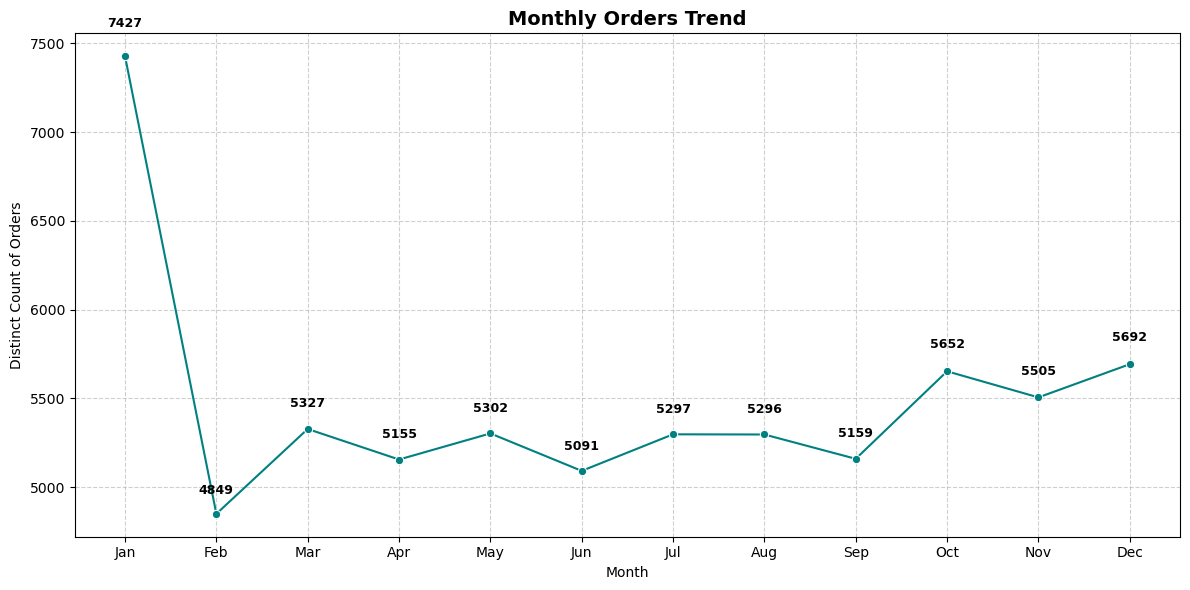

In [ ]:
# Extract month number from the date
data_co["Month_Num"] = data_co["order_date_DateOrders"].dt.month

# Distinct Order_Id count per month
monthly_orders = (
    data_co.groupby("Month_Num")["Order_Id"]
    .nunique()
    .reset_index()
)

# Add Month Name (Jan, Feb, etc.)
monthly_orders["Month_Name"] = monthly_orders["Month_Num"].apply(lambda x: calendar.month_abbr[x])

# Sort months in calendar order
monthly_orders = monthly_orders.sort_values("Month_Num")

# --- Plot ---
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_orders,
    x="Month_Name",
    y="Order_Id",
    marker="o",
    color="teal"
)

# Add data labels
for i, row in monthly_orders.iterrows():
    plt.text(
        row["Month_Name"],
        row["Order_Id"] + (row["Order_Id"] * 0.02),  
        f"{row['Order_Id']}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold"
    )

plt.title("Monthly Orders Trend", fontsize=14, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Distinct Count of Orders")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Top 10 Product Categories by Total Revenue

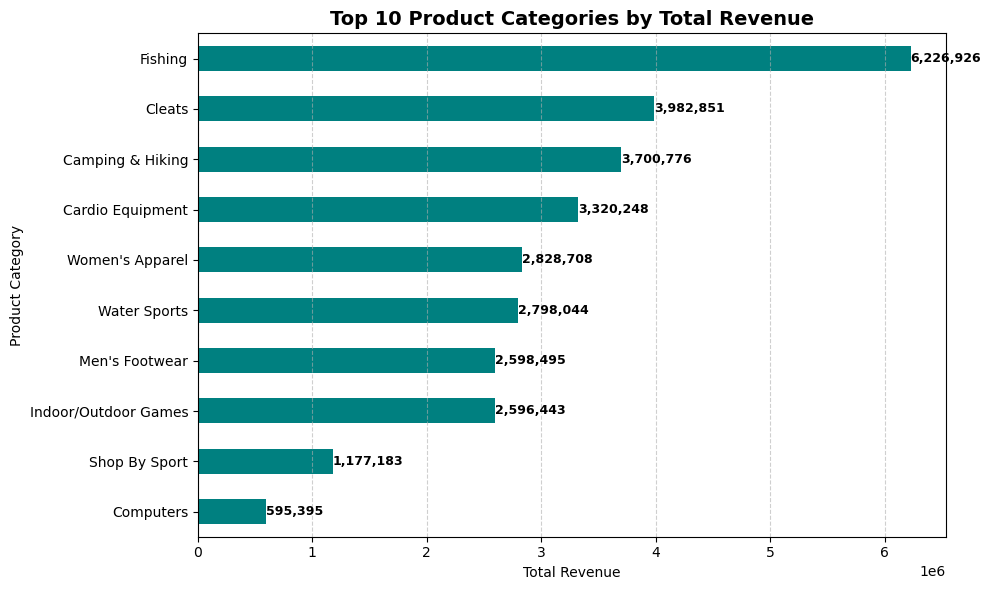

In [ ]:


# --- Calculate Revenue Column like SUMX ---
data_co["Revenue"] = (
    (data_co["Order_Item_Product_Price"] * data_co["Order_Item_Quantity"]) 
    - data_co["Order_Item_Discount"]
)

# Group by Category and sum revenue → Take Top 10
revenue_by_category = (
    data_co.groupby("Category_Name")["Revenue"]
    .sum()
    .sort_values(ascending=False)   # sort descending
    .head(10)                       # take top 10
    .sort_values(ascending=True)    # re-sort for better horizontal bar display
)

# --- Plot ---
plt.figure(figsize=(10, 6))
bars = revenue_by_category.plot(
    kind="barh",   # horizontal bar → Category on Y-axis
    color="teal"
)

# Add data labels on bars
for i, val in enumerate(revenue_by_category):
    plt.text(val, i, f"{val:,.0f}", va="center", ha="left", fontsize=9, fontweight="bold")

plt.title("Top 10 Product Categories by Total Revenue", fontsize=14, fontweight="bold")
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


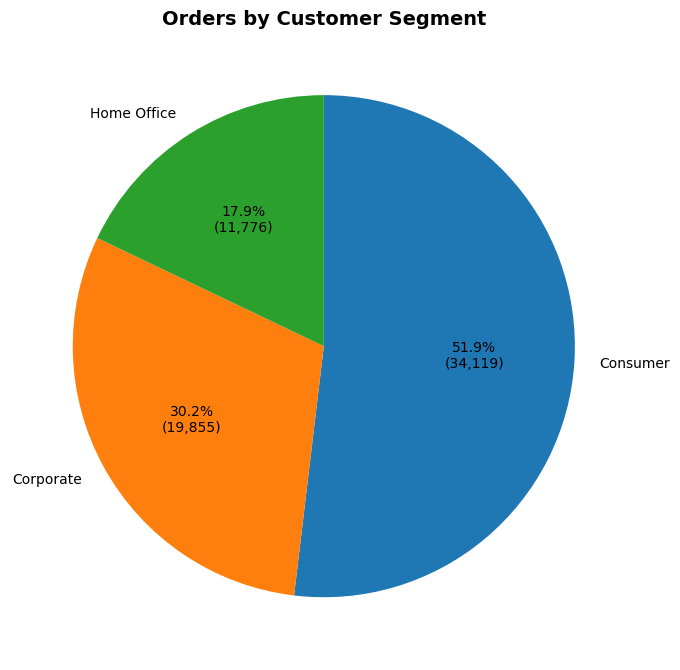

In [8]:
# --- Count distinct Order_Id per Customer_Segment ---
orders_by_segment = (
    data_co.groupby("Customer_Segment")["Order_Id"]
    .nunique()
    .sort_values(ascending=False)
)

# --- Pie Chart ---
plt.figure(figsize=(7, 7))
plt.pie(
    orders_by_segment,
    labels=orders_by_segment.index,  # Legend / Customer Segment
    autopct=lambda p: f'{p:.1f}%\n({int(p*orders_by_segment.sum()/100):,})',  # % + count
    startangle=90,
    counterclock=False
)

plt.title("Orders by Customer Segment", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


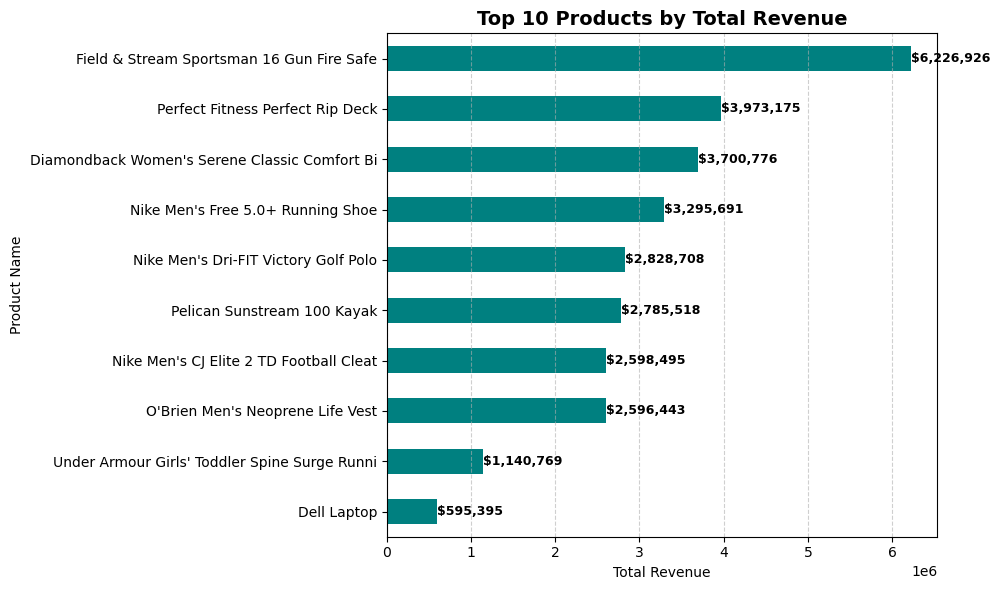

In [9]:
# --- Calculate Revenue per product like SUMX ---
data_co["Revenue"] = (
    (data_co["Order_Item_Product_Price"] * data_co["Order_Item_Quantity"]) 
    - data_co["Order_Item_Discount"]
)

# Group by Product_Name and sum revenue → Take Top 10
revenue_by_product = (
    data_co.groupby("Product_Name")["Revenue"]
    .sum()
    .sort_values(ascending=False)   # sort descending
    .head(10)                       # take top 10
    .sort_values(ascending=True)    # re-sort for horizontal bar chart (highest on top)
)

# --- Plot Horizontal Bar Chart ---
plt.figure(figsize=(10, 6))
bars = revenue_by_product.plot(
    kind="barh", 
    color="teal"
)

# Add data labels on bars
for i, val in enumerate(revenue_by_product):
    plt.text(val, i, f"${val:,.0f}", va="center", ha="left", fontsize=9, fontweight="bold")

plt.title("Top 10 Products by Total Revenue", fontsize=14, fontweight="bold")
plt.xlabel("Total Revenue")
plt.ylabel("Product Name")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


# Delivery Performance Dashboard

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import calendar

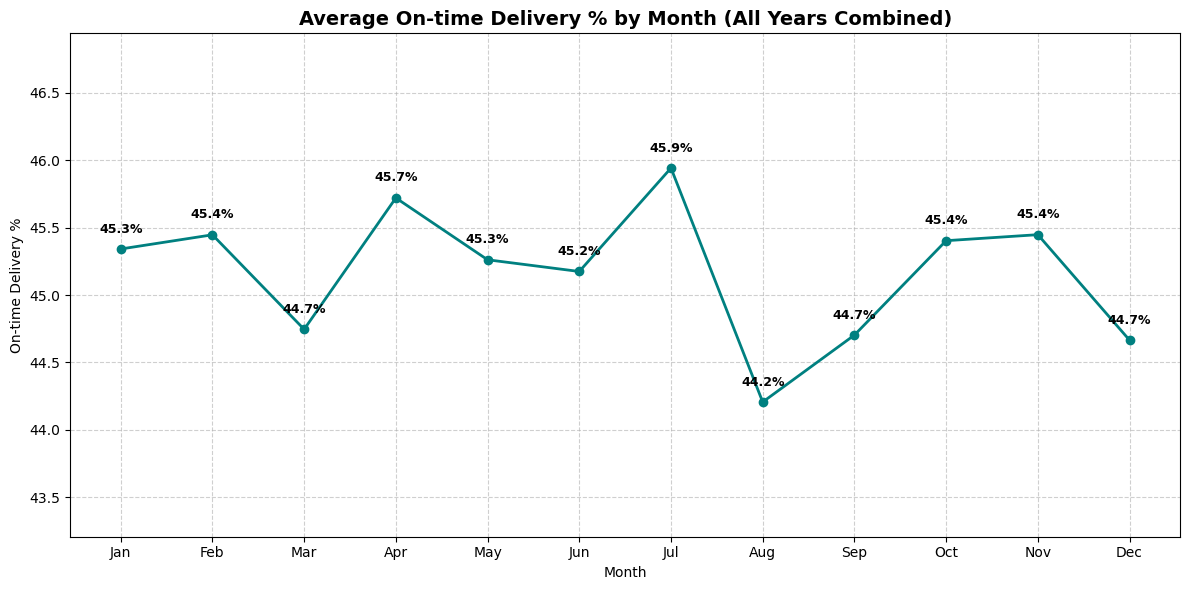

In [11]:

# Create on_time column (1 = on time, 0 = late)
data_co['on_time'] = data_co['Late_delivery_risk'].apply(lambda x: 1 if x == 0 else 0)

# Extract month number from the date (ignore year)
data_co['Month_Num'] = data_co['order_date_DateOrders'].dt.month

# Calculate average on-time % per month
on_time_trend = data_co.groupby('Month_Num')['on_time'].mean() * 100
on_time_trend = on_time_trend.reset_index()
on_time_trend['Month_Name'] = on_time_trend['Month_Num'].apply(lambda x: calendar.month_abbr[x])

# Sort months in calendar order
on_time_trend = on_time_trend.sort_values('Month_Num')

# --- Plot ---
plt.figure(figsize=(12,6))
plt.plot(on_time_trend['Month_Name'], on_time_trend['on_time'], marker='o', color='teal', linewidth=2)

# Add data labels
for i, val in enumerate(on_time_trend['on_time']):
    plt.text(i, val + 0.1, f"{val:.1f}%", ha='center', va='bottom', fontsize=9, fontweight='bold')

# Dynamic Y-axis limits based on min and max
y_min = on_time_trend['on_time'].min() - 1  # slightly below min
y_max = on_time_trend['on_time'].max() + 1  # slightly above max
plt.ylim(y_min, y_max)

plt.title("Average On-time Delivery % by Month (All Years Combined)", fontsize=14, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("On-time Delivery %")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


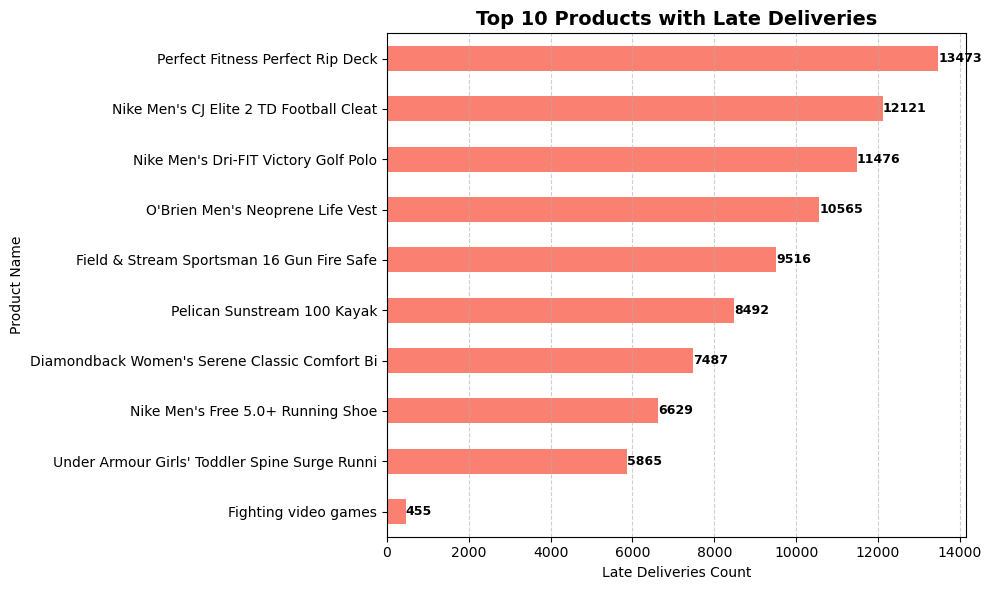

In [12]:
import matplotlib.pyplot as plt

# Filter late deliveries (Late_delivery_risk = 1)
late_by_product = (
    data_co[data_co['Late_delivery_risk'] == 1]['Product_Name']
    .value_counts()
    .nlargest(10)  # Top 10 products
    .sort_values(ascending=True)  # sort for horizontal bar
)

# --- Plot Horizontal Bar Chart ---
plt.figure(figsize=(10,6))
bars = late_by_product.plot(kind='barh', color='salmon')

# Add data labels
for i, val in enumerate(late_by_product):
    plt.text(val, i, f"{val}", va='center', ha='left', fontsize=9, fontweight='bold')

plt.title("Top 10 Products with Late Deliveries", fontsize=14, fontweight='bold')
plt.xlabel("Late Deliveries Count")
plt.ylabel("Product Name")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

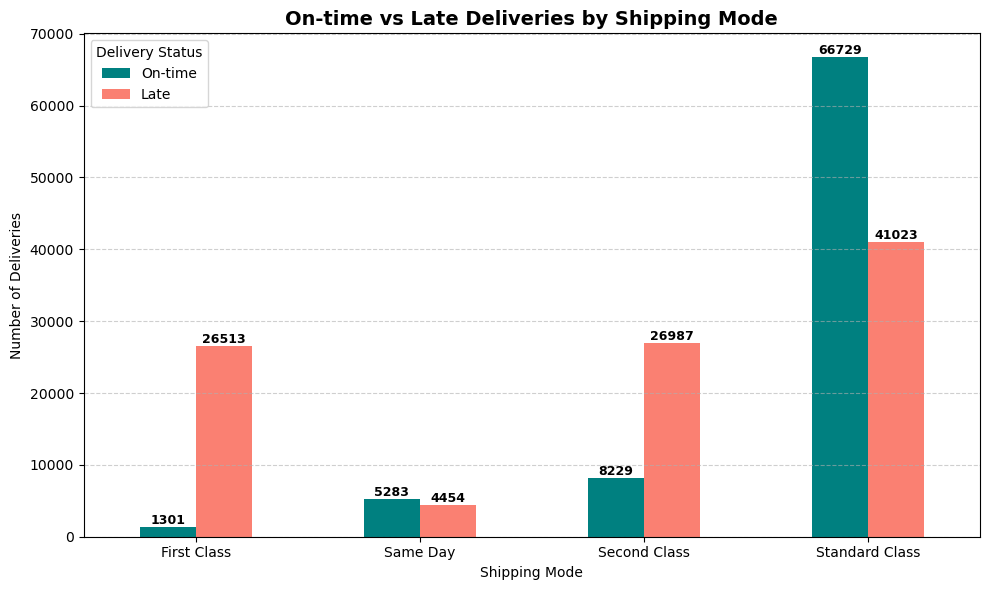

In [13]:
import matplotlib.pyplot as plt

# Group by Shipping_Mode and Late_delivery_risk
delivery_by_shipmode = data_co.groupby(['Shipping_Mode', 'Late_delivery_risk']).size().unstack(fill_value=0)

# Rename columns for clarity
delivery_by_shipmode.columns = ['On-time', 'Late']  # 0 → On-time, 1 → Late

# --- Plot Clustered Bar Chart ---
ax = delivery_by_shipmode.plot(kind='bar', figsize=(10,6), color=['teal', 'salmon'])

plt.title("On-time vs Late Deliveries by Shipping Mode", fontsize=14, fontweight='bold')
plt.ylabel("Number of Deliveries")
plt.xlabel("Shipping Mode")
plt.xticks(rotation=0)
plt.legend(title="Delivery Status")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# --- Add Data Labels ---
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

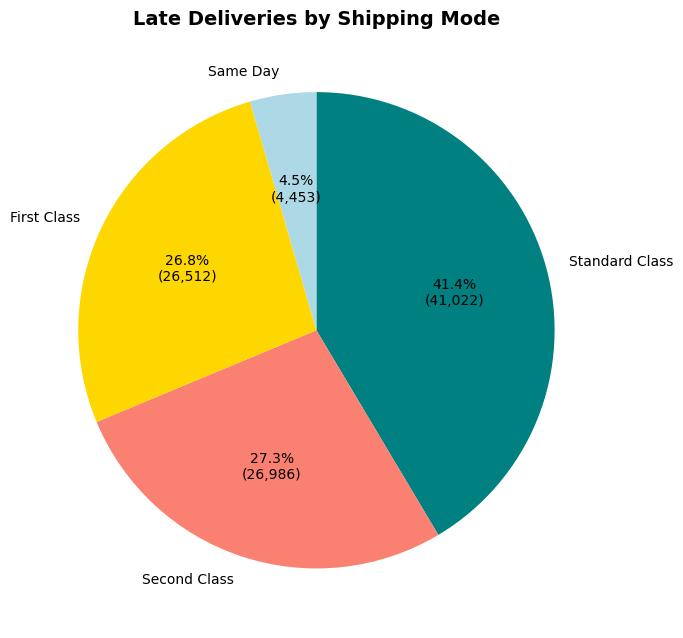

In [14]:
# Filter late deliveries (Late_delivery_risk = 1) and count by Shipping_Mode
late_by_shipmode = data_co[data_co['Late_delivery_risk'] == 1]['Shipping_Mode'].value_counts()

# --- Pie Chart ---
plt.figure(figsize=(7,7))
plt.pie(
    late_by_shipmode,
    labels=late_by_shipmode.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p*late_by_shipmode.sum()/100):,})',  # % + count
    startangle=90,
    counterclock=False,
    colors=['teal', 'salmon', 'gold', 'lightblue']  # optional: assign colors
)

plt.title("Late Deliveries by Shipping Mode", fontsize=14, fontweight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

# Shipping Mode & Logistics Dashboard

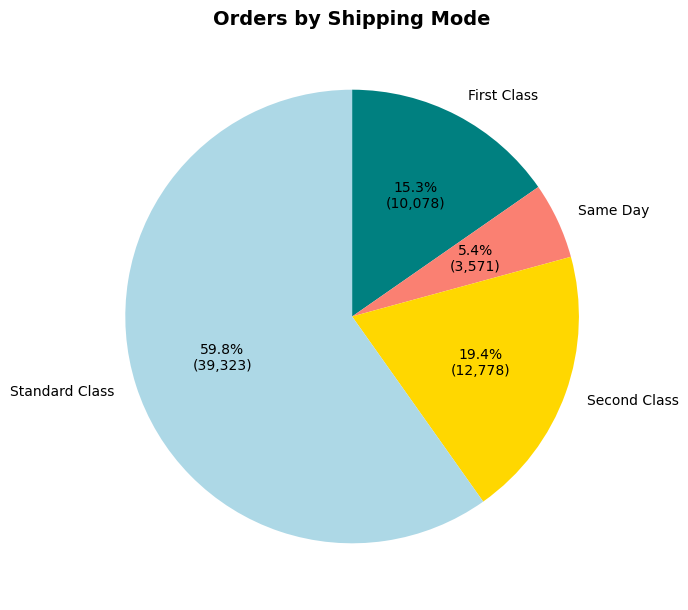

In [15]:
# Count distinct Order_Id per Shipping_Mode (all orders)
orders_by_shipmode = data_co.groupby('Shipping_Mode')['Order_Id'].nunique()

# --- Pie Chart ---
plt.figure(figsize=(7,7))
plt.pie(
    orders_by_shipmode,
    labels=orders_by_shipmode.index,  # Legend / Shipping Mode
    autopct=lambda p: f'{p:.1f}%\n({int(p*orders_by_shipmode.sum()/100):,})',  # % + count
    startangle=90,
    counterclock=False,
    colors=['teal', 'salmon', 'gold', 'lightblue']  # optional colors
)

plt.title("Orders by Shipping Mode", fontsize=14, fontweight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

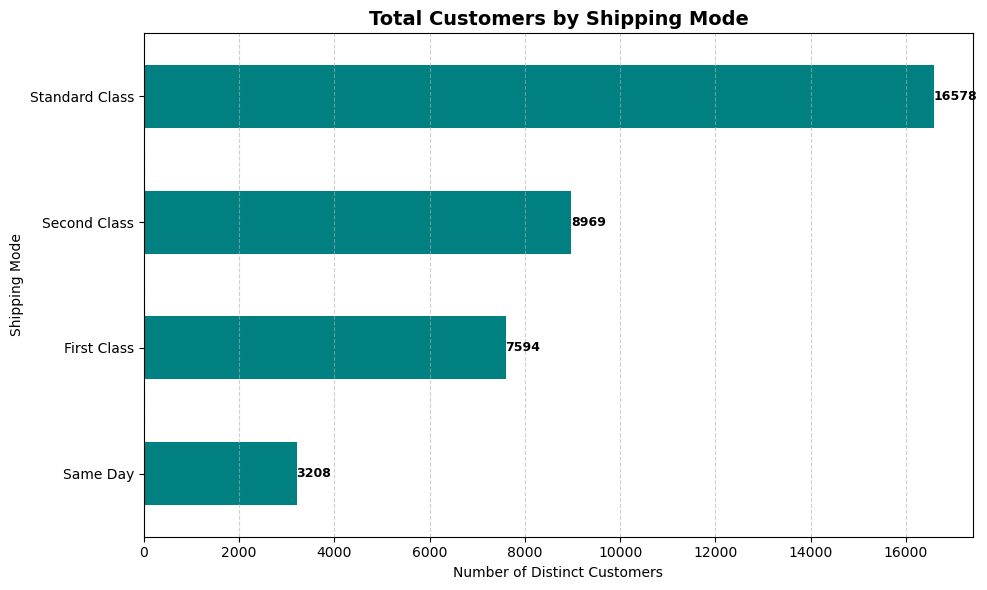

In [16]:
import matplotlib.pyplot as plt

# Count distinct customers per Shipping_Mode
customers_by_shipmode = data_co.groupby('Shipping_Mode')['Customer_Id'].nunique().sort_values(ascending=True)

# --- Plot Horizontal Bar Chart ---
plt.figure(figsize=(10,6))
bars = customers_by_shipmode.plot(kind='barh', color='teal')

# Add data labels
for i, val in enumerate(customers_by_shipmode):
    plt.text(val, i, f"{val}", va='center', ha='left', fontsize=9, fontweight='bold')

plt.title("Total Customers by Shipping Mode", fontsize=14, fontweight='bold')
plt.xlabel("Number of Distinct Customers")
plt.ylabel("Shipping Mode")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

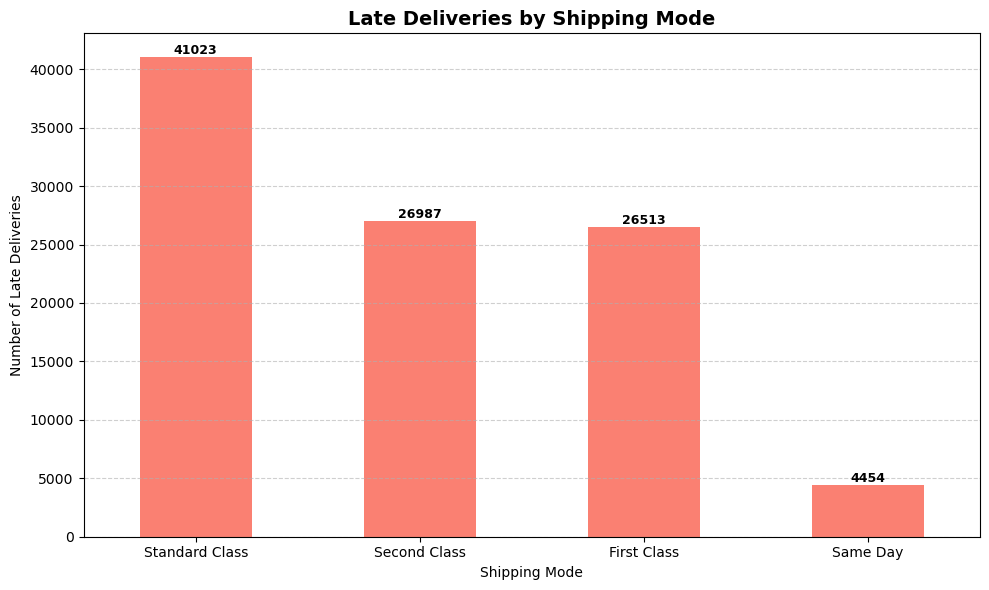

In [17]:
import matplotlib.pyplot as plt

# Count late deliveries per Shipping_Mode
late_deliveries = data_co[data_co['Late_delivery_risk'] == 1].groupby('Shipping_Mode')['Order_Id'].count()

# --- Plot Column Chart ---
plt.figure(figsize=(10,6))
bars = late_deliveries.sort_values(ascending=False).plot(kind='bar', color='salmon')

# Add data labels
for i, val in enumerate(late_deliveries.sort_values(ascending=False)):
    plt.text(i, val + 0.5, f"{val}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title("Late Deliveries by Shipping Mode", fontsize=14, fontweight='bold')
plt.xlabel("Shipping Mode")
plt.ylabel("Number of Late Deliveries")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()